In [44]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math


In [45]:
#importing the data set
from sklearn.datasets import load_iris
iris = load_iris()

In [46]:
#loading the data set

x = iris.data[:,:2]
y = (iris.target != 0) * 1

d = len(x[0,:])

In [47]:
#standardizing the feature vector

mean = np.mean(x, axis=0)
std = np.std(x, axis =0, ddof=0)
x = (x-mean)/std

xp = x

In [48]:
#adding the bias feature

bias = []
for i in range(0,len(x)):
    bias.insert(i,[1]) 

x = np.insert(x,[0],bias, axis=1)

In [49]:
np.asarray(x)
np.asarray(y)

x_transpose = x.transpose()

#learning rate
rate = 0.01
n = len(x)
theta  = []

y_pred = []
gr = []
loss = 0

for i in range(0,d+1):
    theta.append(np.random.uniform(-1,1))


for i in range(0,10000):
    
    prev_loss = loss
      
    #calculate loss function for each sample
    loss = 0
    for j in range(0,n):
        
        #calculating the gradient
        g = 1/(1+math.exp(-np.dot(x[j],theta)))
        gr.append(g)
        loss = loss+ (y[j]*np.log(g) + (1-y[j])*np.log(1-g))   
   
    #applying the second condition
    change = abs(loss - prev_loss)
    if change < pow(2,-23):
        break
        
    #updating the theta values
    xty = np.subtract(y,gr)
    update = (rate/n)*np.dot(x_transpose,xty)   
    theta = np.add(theta,update)
    gr.clear()

print(theta)
print(loss) 



[ 2.15695464  3.78421736 -2.55601097]
-6.898913146562845


[19.97028527]
[[ 19.97028527  60.36395919 -28.8049862 ]]


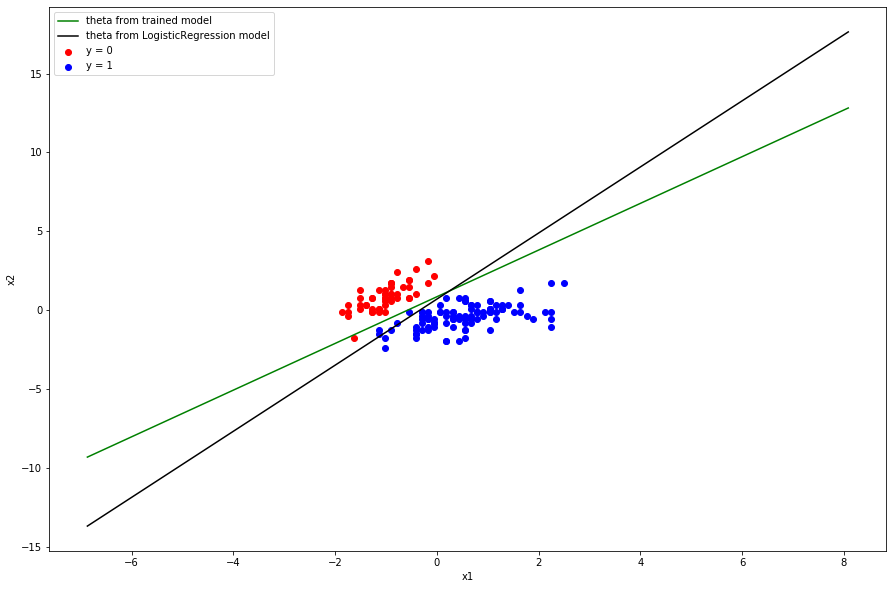

In [58]:
#confirming values using LogisticRegression model

from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(penalty='none', solver ='lbfgs',max_iter=10000)
lgr.fit(x,y) 

print(lgr.intercept_)
print(lgr.coef_)

#plotting the graph
x_0 = xp[np.where(y == 0.0)] 
x_1 = xp[np.where(y == 1.0)] 
plt.figure(figsize=(15,10)) 

plt.scatter([x_0[:, 0]], [x_0[:, -1]], c='r', label='y = 0') 
plt.scatter([x_1[:, 0]], [x_1[:, -1]], c='b', label='y = 1') 


x1 = [np.min(xp[:, 0] - 5), np.max(xp[:, 1] + 5)]
x2 = (-1/theta[2]) * (np.dot(theta[1],x1) + theta[0])
x3 = (-1/lgr.coef_[0][2]) * (np.dot(lgr.coef_[0][1],x1) + lgr.coef_[0][0])
plt.plot(x1, x2, c='g', label='theta from trained model') 
plt.plot(x1, x3, c='k', label='theta from LogisticRegression model') 

plt.xlabel('x1') 
plt.ylabel('x2') 
plt.legend() 
plt.show()
